# Flight Price prediction




**Name:** <ins>Aaditya Mehetre</ins>   **Batch:** <ins>20823</ins>

In this notebook, we will be using machine learning to predict the price of flights. We will use a dataset of flights from Kaggle. The dataset contains information about flights, such as the airline, the source and destination cities, the departure and arrival times, the class of seat, the number of days before the flight, and the ticket price.

We will use a variety of machine learning techniques to predict the price of flights. We will start by using a simple linear regression model. We will then use a more complex model, such as a random forest model. We will evaluate the performance of our models using a variety of metrics, such as the mean squared error and the R-squared value.

In the end, we will choose the best model based on its performance

## About the dataset


The dataset contains information about flight booking options between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

The features are:


* Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
* Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
* Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
* Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
* Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
* Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
* Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
* Price: Target variable stores information of the ticket price.

### Importing dataset from kaggle:

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 85.3MB/s]


In [9]:
%mkdir flight-dataset

mkdir: cannot create directory ‘flight-dataset’: File exists


In [10]:
!unzip -q /content/flight-price-prediction.zip -d /content/flight-dataset

#### Importing Libraries

Let's start by importing the required libraries/modules.  

In [11]:
# Import python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Import

Importing data into a pandas dataframe

In [12]:
# Import data using panads.
flightdf = pd.read_csv('/content/flight-dataset/Clean_Dataset.csv')
flightdf

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Data Cleaning, Preparation and EDA

Let's take a look at a few rows of flightdf

In [13]:
flightdf.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
# display the column names
flightdf.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

There are about 11 features in the dataframe, airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left and price

In [15]:
#list columns and feilds
list(flightdf)

['Unnamed: 0',
 'airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

In [16]:
#display the number of rows and columns
flightdf.shape

(300153, 12)

The dataset contains 300,153 rows and 12 columns one of which is index

In [17]:
flightdf.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In the dataset, there are four numerical variables, one of which is the target variable 'price' and the remaining are categorical variables.


In [18]:
flightdf.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


The minimum price of a flight ticket is 1,105 when compared with the maximum fare 123,071. The min duration is 0.83hrs and max duration is 49.83hrs.


Dropping the unnecessary index column:

In [19]:
flightdf.drop('Unnamed: 0', axis = 1, inplace= True)


In [20]:
flightdf.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [21]:
flightdf.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Some values in the dataset repeat randomly and some are unique, there are no null values in any of the columns.

To maintain consistency, let's convert all the strings to uppercase.

In [22]:
flightdf[["airline", "flight", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]] = flightdf[["airline", "flight", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]].apply(lambda x: [i.upper() for i in x] )

In [23]:
flightdf.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SPICEJET,SG-8709,DELHI,EVENING,ZERO,NIGHT,MUMBAI,ECONOMY,2.17,1,5953
1,SPICEJET,SG-8157,DELHI,EARLY_MORNING,ZERO,MORNING,MUMBAI,ECONOMY,2.33,1,5953
2,AIRASIA,I5-764,DELHI,EARLY_MORNING,ZERO,EARLY_MORNING,MUMBAI,ECONOMY,2.17,1,5956
3,VISTARA,UK-995,DELHI,MORNING,ZERO,AFTERNOON,MUMBAI,ECONOMY,2.25,1,5955
4,VISTARA,UK-963,DELHI,MORNING,ZERO,MORNING,MUMBAI,ECONOMY,2.33,1,5955


In [24]:
flightdf = flightdf.drop_duplicates()

Dropped all the duplicates

### **EDA of Features & Target**

In [25]:
flightdf['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

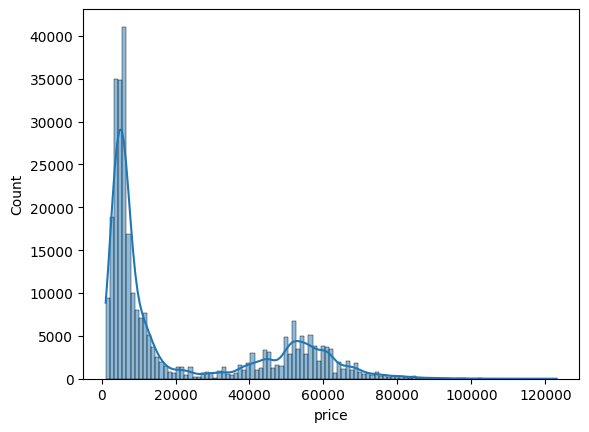

In [26]:
sns.histplot(data=flightdf['price'] ,kde=True)

Our target variable has a right skewness. Most of our price values in a range of 1000-40000 and we can predict that these values contain alot of Economy class, little of Business class.

In [27]:
flightdf['airline'].value_counts()

VISTARA      127859
AIR_INDIA     80892
INDIGO        43120
GO_FIRST      23173
AIRASIA       16098
SPICEJET       9011
Name: airline, dtype: int64

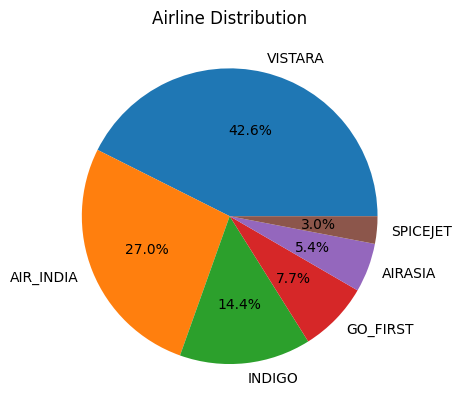

In [28]:
# Create a pieplot of the airline with the most number of flights
plt.title('Airline Distribution')

# Count the occurrences of each airline
airline_counts = flightdf['airline'].value_counts()

# Plot a pie chart
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%')

plt.show()

The pie chart shows the distribution of airlines in the flightdf DataFrame. VISTARA has the highest number of flights, followed by AIR_INDIA, INDIGO, GO_FIRST, AIRASIA, and SPICEJET.

In [29]:
flightdf['class'].value_counts()

ECONOMY     206666
BUSINESS     93487
Name: class, dtype: int64

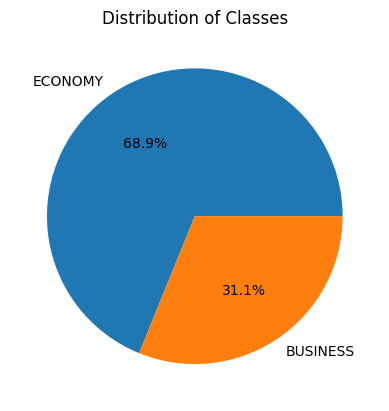

In [30]:
plt.pie(flightdf["class"].value_counts(), labels=flightdf["class"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Classes")
plt.show()

As seen, Economy class tickets are the most bought.



In [31]:
flightdf['stops'].value_counts()

ONE            250863
ZERO            36004
TWO_OR_MORE     13286
Name: stops, dtype: int64

<Axes: xlabel='stops', ylabel='price'>

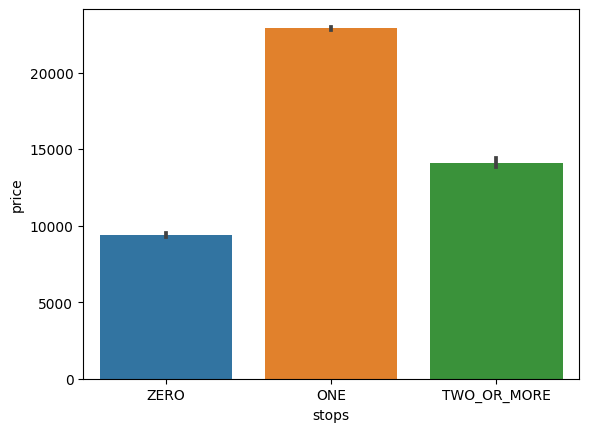

In [32]:
sns.barplot(data = flightdf, x ="stops", y="price")

The data shows that flights with more stops are typically more expensive than flights with fewer stops. This is likely due to the fact that flights with more stops take longer to travel and require more fuel.

In [33]:
flightdf['source_city'].value_counts()

DELHI        61343
MUMBAI       60896
BANGALORE    52061
KOLKATA      46347
HYDERABAD    40806
CHENNAI      38700
Name: source_city, dtype: int64

The data shows that the most popular source cities for flights are Delhi, Mumbai, Bengaluru, Kolkata, Hyderabad, and Chennai. These cities are all major metropolitan areas with large populations and strong economies. As a result, there is a high demand for flights to and from these cities.

## EDA by means of data visualization

### We are going to analyze the below questions by means of Data Visualization :-

* How does the ticket price vary with the type of airline?
* How does the ticket price vary with the departure time and arrival time?
* How does the ticket price vary with the source city and destination city?
* How does the ticket price vary with the number of stops of a flight?


#### Q1: How does the ticket price vary with the type of airline?

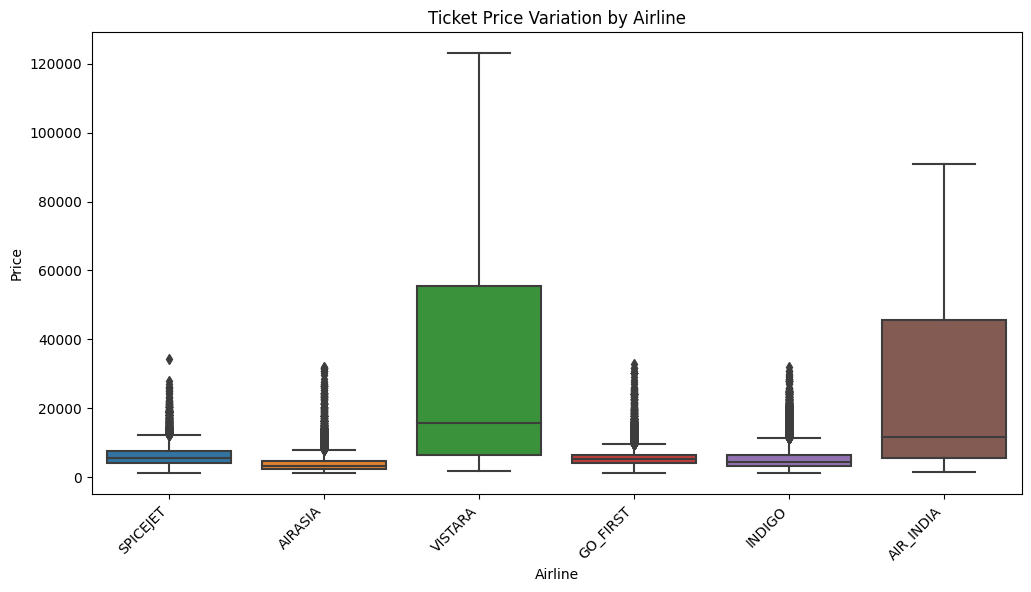

In [34]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="airline", y="price", data=flightdf)
plt.title("Ticket Price Variation by Airline")
plt.xlabel("Airline")
plt.ylabel("Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()


Air India and Vistara have the most expensive flight tickets among the airlines in the dataset, while AirAsia provides the most affordable fares. Specifically, in the context of business class, Vistara's prices are the highest in comparison to AirAsia.

#### Q2: How does the ticket price vary with the departure time and arrival time?

Text(0.5, 1.0, 'Airline prices based on the arrival time')

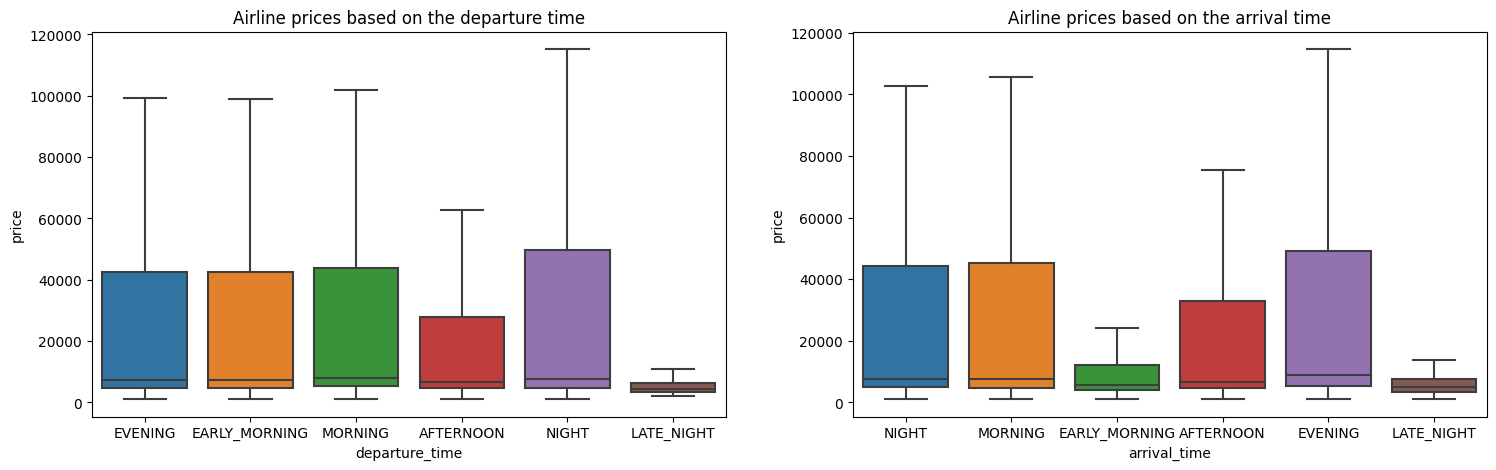

In [35]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=flightdf, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time")
plt.subplot(1,2,2)
sns.boxplot(data=flightdf, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time")


  
The box plot indicates that traveling during late night hours, both departing and arriving, is the most cost-effective option. Additionally, it is apparent that early morning flights are also budget-friendly, while afternoon flights come at a slightly lower cost compared to evening, morning, and night flights.


#### Q3: How does the ticket price vary with the source city and destination city?

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

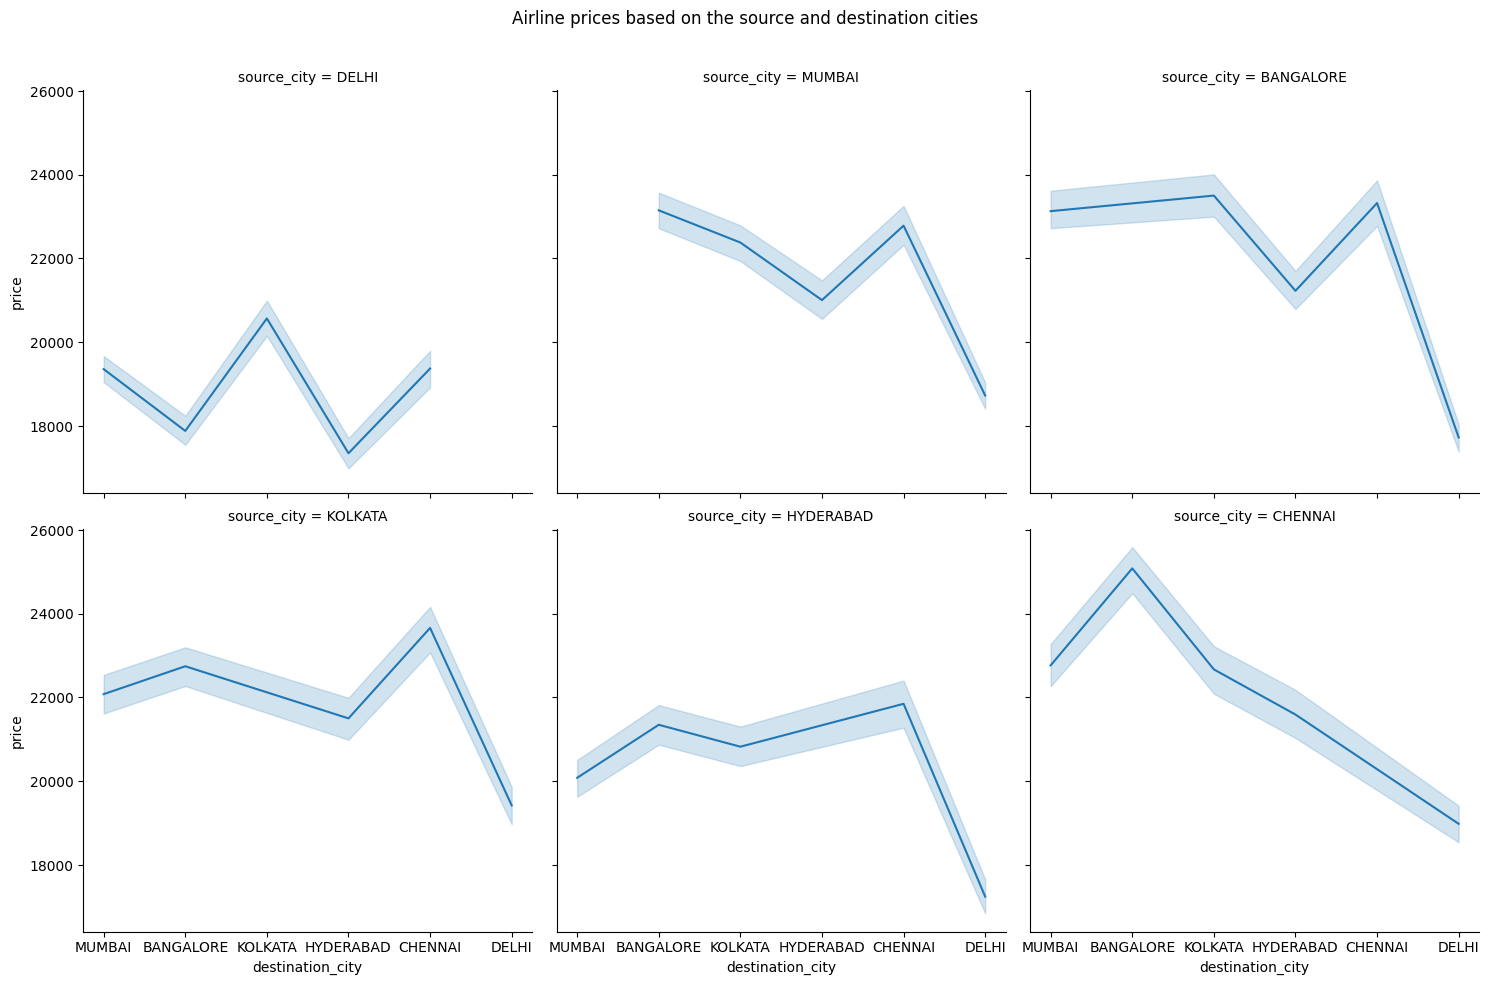

In [36]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=flightdf, col_wrap=3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline prices based on the source and destination cities')

It implies that flight leaving and arriving at Delhi are often cheaper whereas flights leaving and arriving at Bangalore are the high priced.



#### Q4: How does the ticket price vary with the number of stops of a flight?

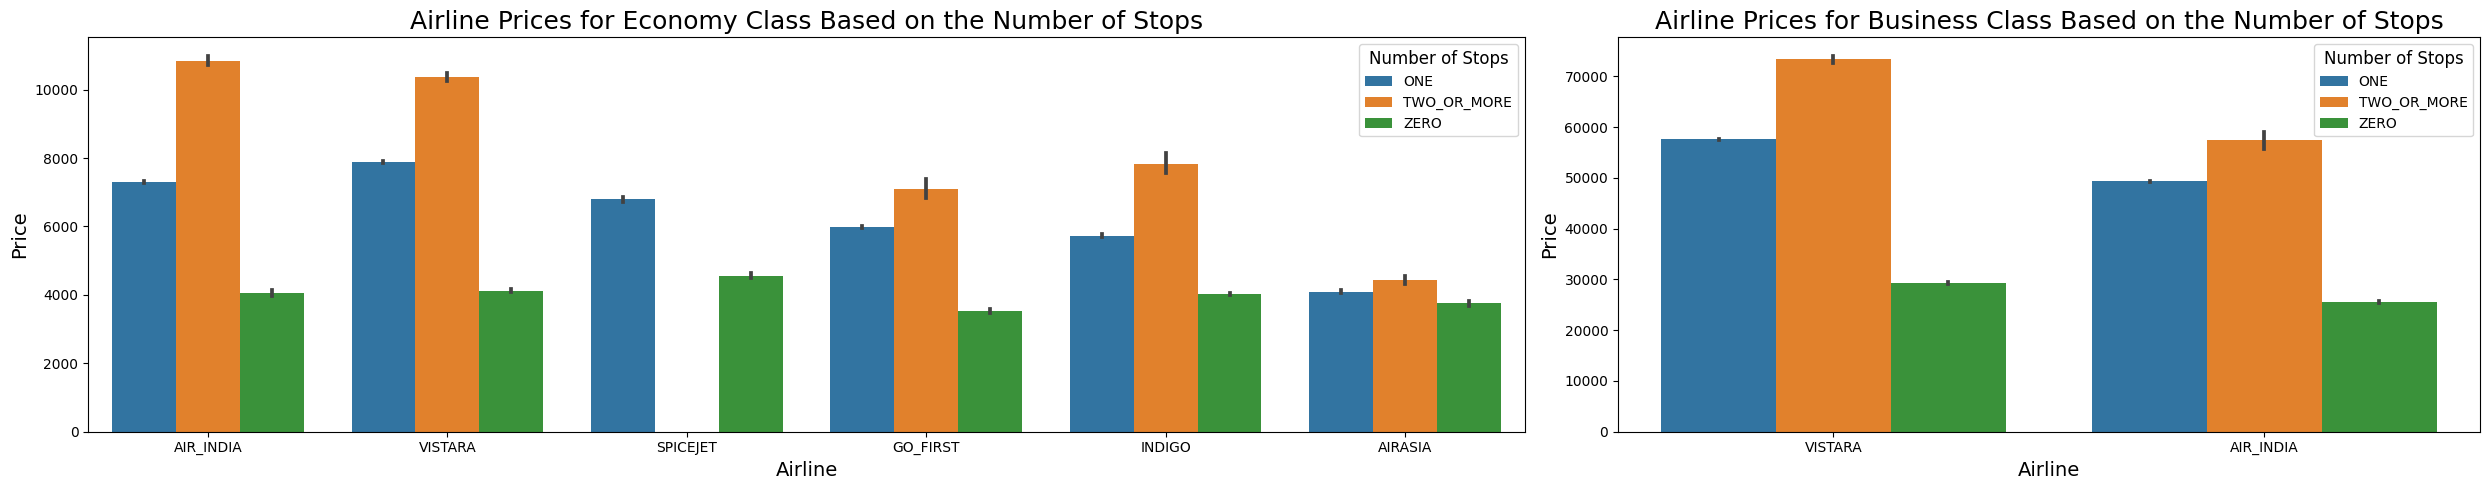

In [44]:
# Create subplots with different widths for comparison
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

# Plot for Economy class
sns.barplot(
    y="price",
    x="airline",
    hue="stops",
    data=flightdf.loc[flightdf["class"] == 'ECONOMY'].sort_values("price", ascending=False),
    ax=axs[0]
)
axs[0].set_title("Airline Prices for Economy Class Based on the Number of Stops", fontsize=18)
axs[0].set_xlabel("Airline", fontsize=14)
axs[0].set_ylabel("Price", fontsize=14)
axs[0].legend(title="Number of Stops", title_fontsize="12", loc="upper right")

# Plot for Business class
sns.barplot(
    y="price",
    x="airline",
    hue="stops",
    data=flightdf.loc[flightdf["class"] == 'BUSINESS'].sort_values("price", ascending=False),
    ax=axs[1]
)
axs[1].set_title("Airline Prices for Business Class Based on the Number of Stops", fontsize=18)
axs[1].set_xlabel("Airline", fontsize=14)
axs[1].set_ylabel("Price", fontsize=14)
axs[1].legend(title="Number of Stops", title_fontsize="12", loc="upper right")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()



Clearly, the flight cost tends to increase with more stops, but AirAsia appears to be an exception with relatively stable prices. The unique behavior and analysis of AirAsia suggest that it operates as a low-cost airline company.


### Checking the skewness and normality of the data.

In [49]:
flightdf[['duration', 'days_left', 'price']].skew()

duration     0.602899
days_left   -0.035464
price        1.061377
dtype: float64


The above skewness values provide insights into the shape of the data distributions:
'duration' and 'price' exhibit right-skewed or positive skewed distributions, with longer tails on the right and data concentrated on the left.
'days_Left' has a skewness value close to zero, indicating a nearly symmetric distribution, which means the data is relatively balanced without strong skewness in either direction.



In [50]:
flightdf[['duration', 'days_left', 'price']].kurtosis()

duration    -0.268996
days_left   -1.156215
price       -0.396293
dtype: float64


The above kurtosis values shows that the data distributions for the three variables, namely Duration, Days Left, and Price are characterized by negative kurtosis values, indicating platykurtic shapes. This means that these distributions have lighter tails and are less peaked compared to a standard normal distribution. Consequently, there is a reduced probability of extreme values or outliers, and the data tends to be more evenly distributed around the mean.

### Visualizations of numeric features with boxplot and histogram to check the outliers and skewness.

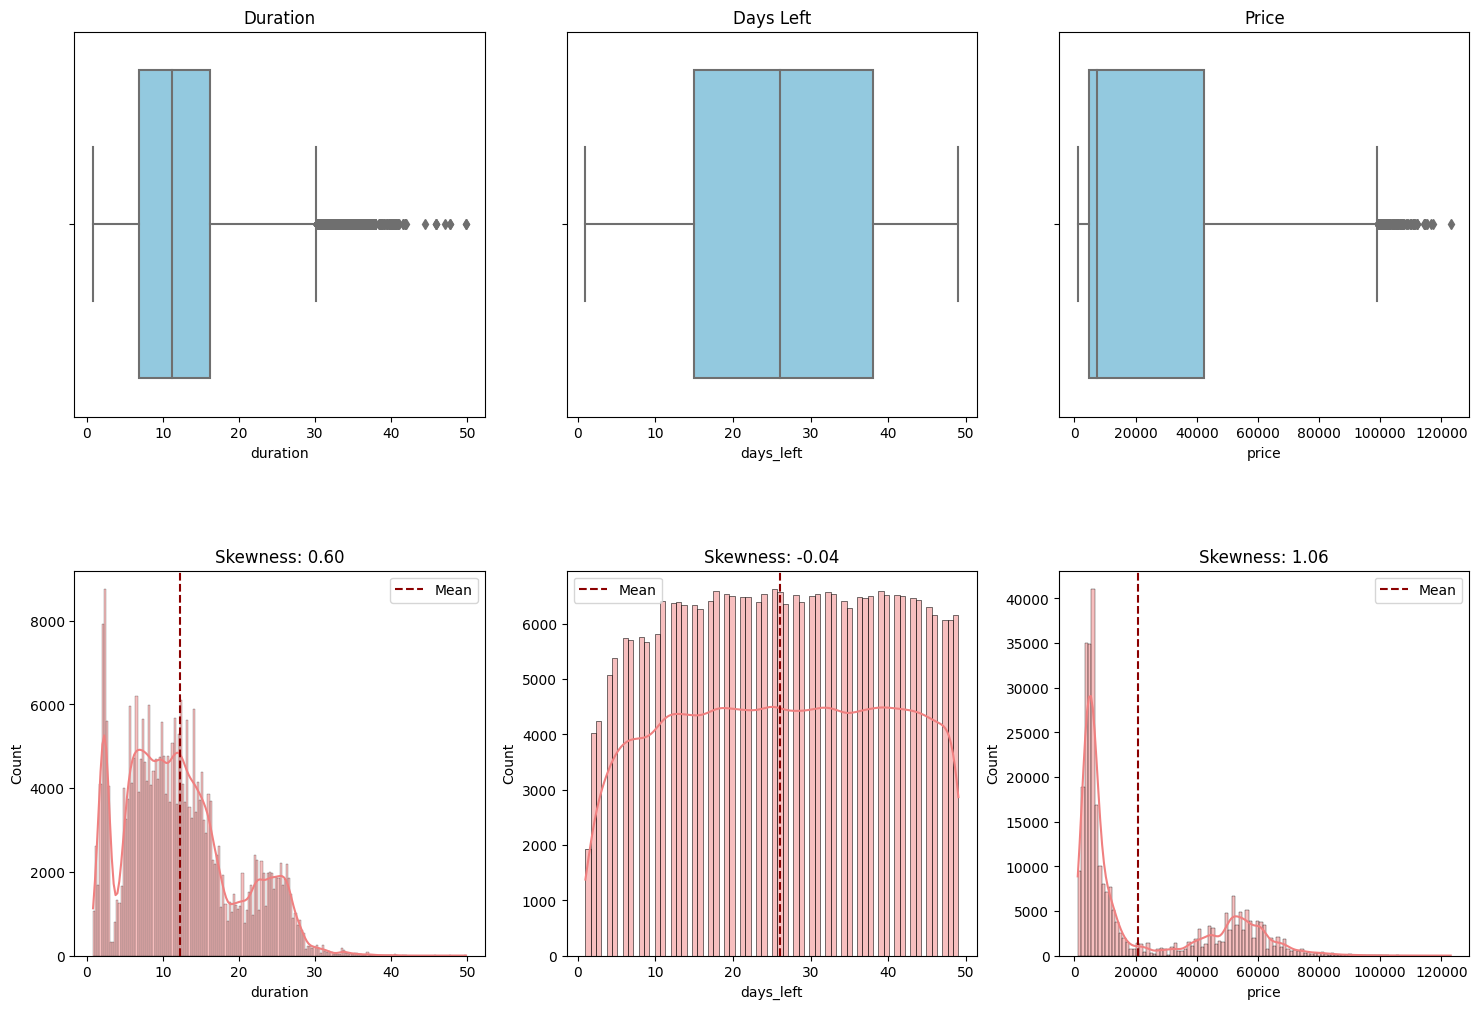

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Create a figure with subplots
plt.figure(figsize=(18, 12))

# Create a grid for subplots
grid = plt.GridSpec(2, 3, hspace=0.4, wspace=0.2)

# Subplot 1: Box Plot and Distribution for Duration
plt.subplot(grid[0, 0])
sns.boxplot(x=flightdf["duration"], data=flightdf, color='skyblue')
plt.title("Duration")

plt.subplot(grid[1, 0])
sns.histplot(flightdf["duration"], kde=True, color='lightcoral')
plt.axvline(x=flightdf["duration"].mean(), color='darkred', linestyle='--', label='Mean')
plt.title("Skewness: {:.2f}".format(flightdf["duration"].skew()))
plt.legend()

# Subplot 2: Box Plot and Distribution for Days Left
plt.subplot(grid[0, 1])
sns.boxplot(x=flightdf["days_left"], data=flightdf, color='skyblue')
plt.title("Days Left")

plt.subplot(grid[1, 1])
sns.histplot(flightdf["days_left"], kde=True, color='lightcoral')
plt.axvline(x=flightdf["days_left"].mean(), color='darkred', linestyle='--', label='Mean')
plt.title("Skewness: {:.2f}".format(flightdf["days_left"].skew()))
plt.legend()

# Subplot 3: Box Plot and Distribution for Price
plt.subplot(grid[0, 2])
sns.boxplot(x=flightdf["price"], data=flightdf, color='skyblue')
plt.title("Price")

plt.subplot(grid[1, 2])
sns.histplot(flightdf["price"], kde=True, color='lightcoral')
plt.axvline(x=flightdf["price"].mean(), color='darkred', linestyle='--', label='Mean')
plt.title("Skewness: {:.2f}".format(flightdf["price"].skew()))
plt.legend()

# Adjust layout for better spacing

plt.show()



Based on the plot shown above, it's evident that target variable 'price' exhibits a positive skew, primarily driven by the 'Business' class on top of that, we're retaining the outlier values in the  target variable, 'price', because they are primarily influenced by the 'class' feature, where business class prices are notably higher than economy class prices. The skewness in duration is primarily affected by the number of stops, which includes 'zero,' 'one,' and 'two_or_more.'

### Data Transformation



 We are using Label encoding to transform Categorical variables into numerical values. We will be using LabelEncoder module from scikit-learn preprocessing modules. This would make it easier for the model to predict numeric values

In [56]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

cat_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Copy the DataFrame
flightdf_original = flightdf.copy()

# Apply label encoding to the specified columns
flightdf[cat_cols] = flightdf[cat_cols].apply(le.fit_transform)

# Display unique encoded values for each categorical column for Data Preprocessing in the Model deployment stage.
for column in cat_cols:
    unique_encoded_values_original = flightdf_original[column].unique()
    unique_encoded_values_transformed = flightdf[column].unique()

    print(f"Original unique values for column '{column}': {unique_encoded_values_original}")
    print(f"Transformed unique encoded values for column '{column}': {unique_encoded_values_transformed}")
    print()


Original unique values for column 'airline': ['SPICEJET' 'AIRASIA' 'VISTARA' 'GO_FIRST' 'INDIGO' 'AIR_INDIA']
Transformed unique encoded values for column 'airline': [4 0 5 2 3 1]

Original unique values for column 'flight': ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Transformed unique encoded values for column 'flight': [1408 1387 1213 ...  558  587  718]

Original unique values for column 'source_city': ['DELHI' 'MUMBAI' 'BANGALORE' 'KOLKATA' 'HYDERABAD' 'CHENNAI']
Transformed unique encoded values for column 'source_city': [2 5 0 4 3 1]

Original unique values for column 'departure_time': ['EVENING' 'EARLY_MORNING' 'MORNING' 'AFTERNOON' 'NIGHT' 'LATE_NIGHT']
Transformed unique encoded values for column 'departure_time': [2 1 4 0 5 3]

Original unique values for column 'stops': ['ZERO' 'ONE' 'TWO_OR_MORE']
Transformed unique encoded values for column 'stops': [2 0 1]

Original unique values for column 'arrival_time': ['NIGHT' 'MORNING' 'EARLY_MORNING' 'AFTERNOON'

In [57]:
flightdf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [58]:
flightdf.dtypes

airline               int64
flight                int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

Most of the data is converted to numeric format.

## Feature selection

### Using Correlation

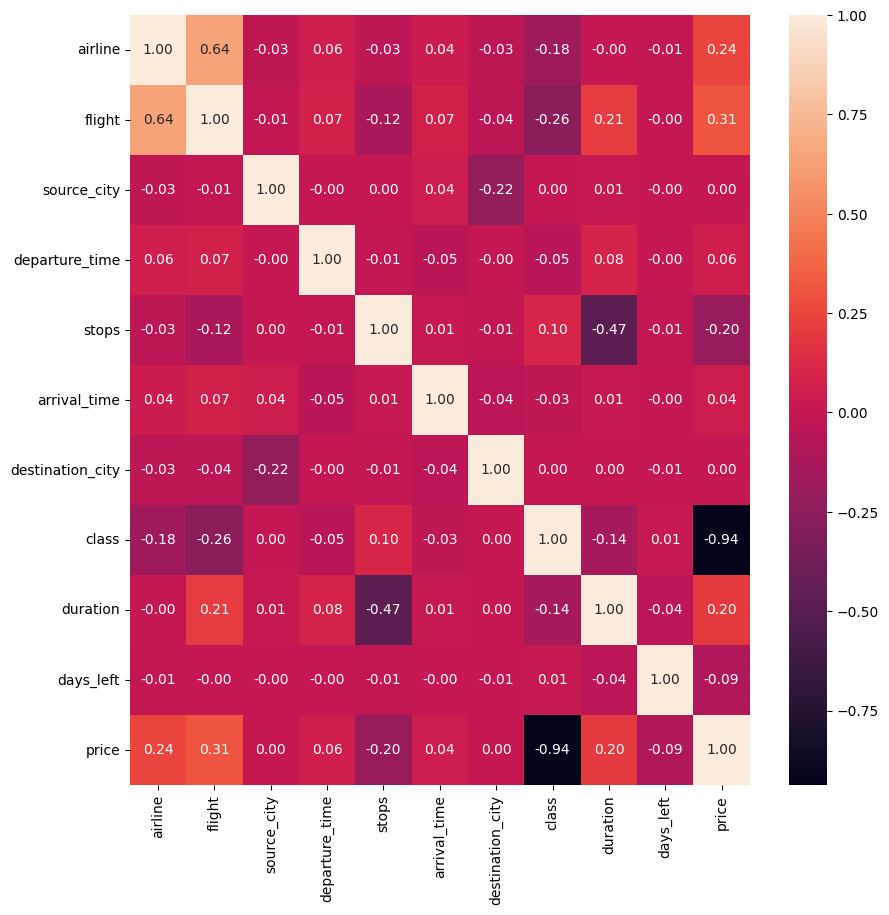

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(flightdf.corr(), annot = True, fmt=".2f")
plt.show()


    
Based on the heatmap above, it's evident that there is a strong correlation between the 'flight' and 'airline' variables. In many cases, it's beneficial to remove highly correlated independent variables from your dataset when building a machine learning model. These highly correlated features, often referred to as multicollinearity, can introduce challenges in model training and interpretation. As a result, we've decided to drop the 'flight' column from our dataset.


While 'airline' has a slightly lower correlation with the target variable 'price,' we've still chosen to eliminate 'flight' to simplify the input data for the model implementaion.

Furthermore, it's worth noting that the independent variables 'source_city' and 'destination_city' exhibit zero correlation with the target variable 'Price.' However, we've retained them in our dataset to explore the usability of other feature selection methods.

Also, 'class' shows highly negative correlation with 'price' which may also be noted.

In [60]:
flightdf.drop('flight', axis = 1, inplace= True)

### Using Filter-based method : Univarite Selection using Statistical test F-statistic (ANOVA)

Since we have mostly categorical Input variable and continuous target variable, we are using ANOVA and selected the 6 most important features. Univariate feature selection using the F-statistic (ANOVA) is a filter-based method that assesses the statistical relationship between each feature and the target variable. It helps identify features that are likely to be relevant for predicting the target variable. The higher the F-statistic value, the more likely the feature is relevant.

In [69]:
from sklearn.feature_selection import SelectKBest, f_regression

# Split the dataset into features (X) and the target variable (Y)
Y = flightdf["price"]
X = flightdf.drop(["price"], axis=1)

# Feature selection using F-statistic (ANOVA)
num_features_to_select = 6  # Number of features to select
f_selector = SelectKBest(score_func=f_regression, k=num_features_to_select)

# Fit the selector to the data
X_selected = f_selector.fit_transform(X, Y)

# Get the indices of the selected features
selected_feature_indices = f_selector.get_support(indices=True)

# Display the selected features and their indices
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)

# Selected features' data
selected_data = X[selected_feature_names]
selected_data.head()


Selected Features: Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'], dtype='object')


,airline,departure_time,stops,class,duration,days_left
0,4,2,2,1,2.17,1
1,4,1,2,1,2.33,1
2,0,1,2,1,2.17,1
3,5,4,2,1,2.25,1
4,5,4,2,1,2.33,1


 The features 'airline', 'departure_time', 'stops', 'class', 'duration' and 'days_left' are found to be more likely to have relevance in predicting 'price'. Next, we will drop the unselected features from our dataframe.

In [70]:
# Droping the unselected features
features_to_drop = [col for col in flightdf.columns if col not in selected_feature_names and col != 'price']
selected_flightdf = flightdf.drop(features_to_drop, axis=1)


selected_flightdf


,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,2.17,1,5953
1,4,1,2,1,2.33,1,5953
2,0,1,2,1,2.17,1,5956
3,5,4,2,1,2.25,1,5955
4,5,4,2,1,2.33,1,5955
...,...,...,...,...,...,...,...
300148,5,4,0,0,10.08,49,69265
300149,5,0,0,0,10.42,49,77105
300150,5,1,0,0,13.83,49,79099
300151,5,1,0,0,10.00,49,81585


## Scaling of variables: using MIN-MAX Normalization

We will be normalizing our data using MinMax normalization. MinMax Scaling is a type of feature scaling or normalization commonly used in machine learning and statistics. It transforms the numerical features of a dataset to a specific range, typically between 0 and 1, based on the minimum and maximum values of each feature. This scaling technique is particularly useful when the features have different scales, and it ensures that all features contribute equally to the analysis.

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Custom new minimum and maximum values
new_min = 0
new_max = 1  # Set your desired maximum value

# Create the MinMaxScaler with selected features using custom feature_range
scaler_selected_features = MinMaxScaler(feature_range=(new_min, new_max))

# List of selected columns to scale
selected_cols = selected_flightdf.columns.tolist()

# Apply min-max scaling to selected columns in selected_flightdf
selected_flightdf[selected_cols] = scaler_selected_features.fit_transform(selected_flightdf[selected_cols])

selected_flightdf


,airline,departure_time,stops,class,duration,days_left,price
0,0.8,0.4,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.2,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.8,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...
300148,1.0,0.8,0.0,0.0,0.188776,1.0,0.558844
300149,1.0,0.0,0.0,0.0,0.195714,1.0,0.623124
300150,1.0,0.2,0.0,0.0,0.265306,1.0,0.639473
300151,1.0,0.2,0.0,0.0,0.187143,1.0,0.659856


In [72]:

# Create the MinMaxScaler with custom feature_range (numerical only)
scaler_numerical = MinMaxScaler(feature_range=(new_min, new_max))

# List of numerical columns to scale
num_cols = ['duration', 'days_left', 'price']

# Apply min-max scaling to the specified numerical columns in selected_flightdf
selected_flightdf[num_cols] = scaler_numerical.fit_transform(selected_flightdf[num_cols])

selected_flightdf

,airline,departure_time,stops,class,duration,days_left,price
0,0.8,0.4,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.2,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.8,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...
300148,1.0,0.8,0.0,0.0,0.188776,1.0,0.558844
300149,1.0,0.0,0.0,0.0,0.195714,1.0,0.623124
300150,1.0,0.2,0.0,0.0,0.265306,1.0,0.639473
300151,1.0,0.2,0.0,0.0,0.187143,1.0,0.659856



The data is now normalized as can be seen above.

### Modeling

#### Splitting of input and target variables

In [73]:
Y = selected_flightdf["price"]
X = selected_flightdf.drop(["price"], axis=1)

#### Splitting dataset for modeling

We will be splitting the dataset into training and testing dataset in 70:30 ratio.

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

### Model 1 - Linear Regression

In [79]:
# model building
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

In [93]:
# Extract the intercept and coefficients
intercept = lr.intercept_
coefficients = lr.coef_

# Get the feature names from selected_flightdf
feature_names = selected_flightdf.columns

# Create a string representation of the linear regression equation
equation = f"Y = {intercept:.2f} + "

for i, (coef, feature) in enumerate(zip(coefficients, feature_names)):
    equation += f"{coef:.2f} * {feature}"
    if i < len(coefficients) - 1:
        equation += " + "

# Print the linear regression equation
print(f"Intercept of linear regression model: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"R2 Score: {lr.score(X_train, Y_train)}")
print("Linear Regression Equation:")
print(equation)


Intercept of linear regression model: 0.41495786253574923
Coefficients: [ 0.03918199  0.001064   -0.05372867 -0.36552514  0.0379644  -0.05186838]
R2 Score: 0.904261699126707
Linear Regression Equation:
Y = 0.41 + 0.04 * airline + 0.00 * departure_time + -0.05 * stops + -0.37 * class + 0.04 * duration + -0.05 * days_left


Y = 0.41 + 0.04 * _airline_ + 0.00 * _departure_time_ + -0.05 * _stops_ + -0.37 * _class_ + 0.04 * _duration_ + -0.05 * _days_left_ is the equation generated by our lr model.

Let's plot a graph of acutal values vs the values predicted by our linear regression model.

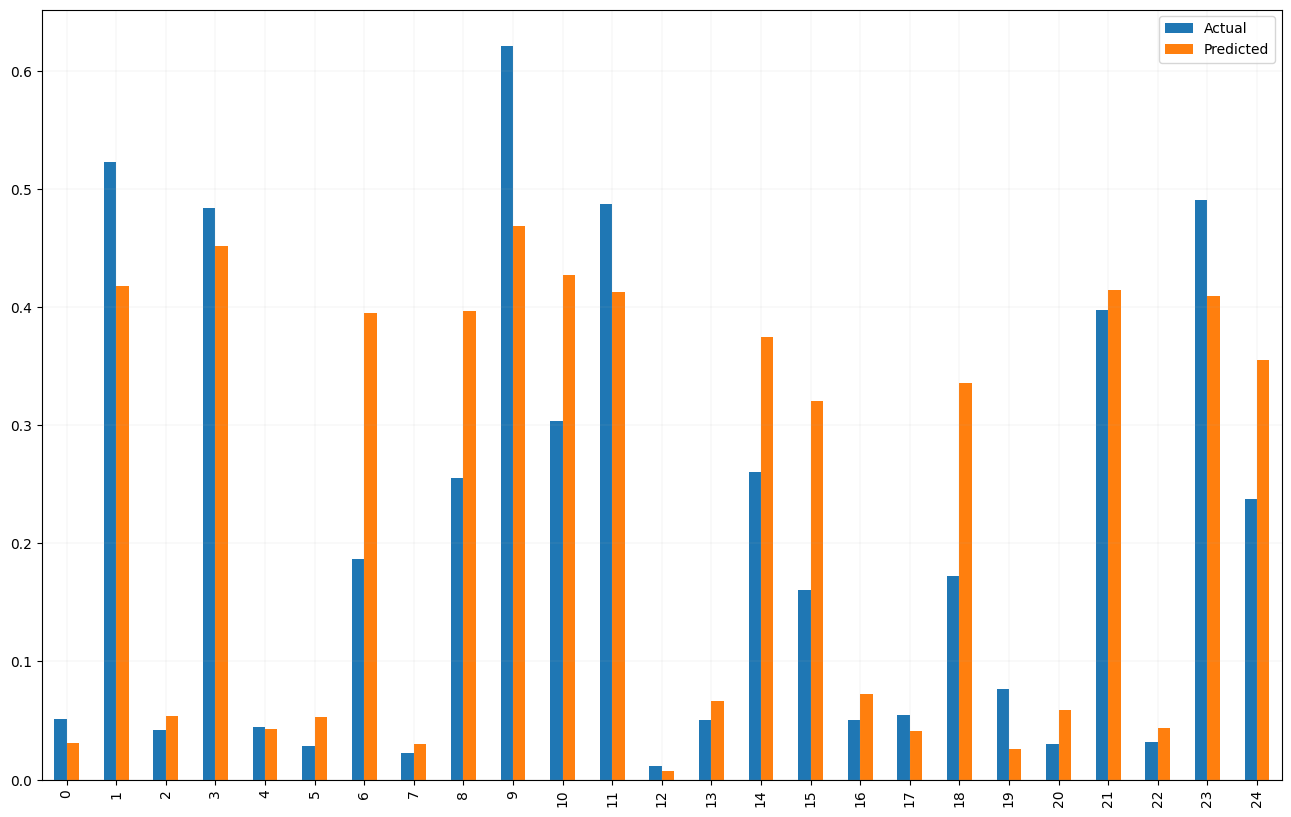

In [81]:
df_lr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})


df1 = df_lr.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()


The actual and predicted values vary by a little bit, they are not the same as can be seen from the graph.

To determine how well our model predicts values, let's use sklearn.metrics.

In [89]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score


# MSE
MSE_LR = mean_squared_error(Y_test, y_pred)
print("MSE: ", MSE_LR)

# RMSE
RMSE_LR = np.sqrt(MSE_LR)
print("RMSE: ", RMSE_LR)

# MAE
MAE_LR = mean_absolute_error(Y_test, y_pred)
print("MAE: ", MAE_LR)

# R2 Score
R2_LR = r2_score(Y_test, y_pred)
print("R2 Score: ", R2_LR)

MSE:  0.003310003285015892
RMSE:  0.05753262800373273
MAE:  0.03789834647589577
R2 Score:  0.9043290504276096


Mean Squared Error (MSE): This value represents the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance.

Root Mean Squared Error (RMSE): This is the square root of the MSE and provides a measure of the average magnitude of the errors. A lower RMSE is generally desirable.

Mean Absolute Error (MAE): This is the average absolute difference between the predicted and actual values. It gives an idea of the average magnitude of the errors without considering their direction.

R-squared (R2) Score: This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 score closer to 1 indicates a better fit.

An R2 score of approximately 0.90 suggests that your model explains about 90% of the variance in the target variable, which is a strong performance.


### Model 2 - Decision Tree Regressor



The Decision Tree Regressor is a machine learning model used for regression tasks. It builds a decision tree from the training data, where each internal node represents a decision based on a specific feature, and each leaf node represents the predicted output. In the context of regression, the model aims to predict continuous numerical values. The tree is constructed by recursively splitting the data into subsets based on the feature that provides the best split according to a specified criterion, often the Mean Squared Error (MSE) or Friedman Mean Squared Error. The depth of the tree is controlled to prevent overfitting. During prediction, input data traverse the tree, and the model outputs the average target value of the training samples in the leaf node reached. Decision trees are interpretable and can capture complex relationships in the data but may be prone to overfitting if not properly regularized. We will be using this as our 2nd model.

In [102]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor with specified parameters
Rtree = DecisionTreeRegressor(
    criterion='friedman_mse',  # Mean Squared Error is the splitting criterion
    max_depth=3  # Maximum depth of the decision tree
)

# Fit the DecisionTreeRegressor on the training data
RT_model = Rtree.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_DTR = RT_model.predict(X_test)

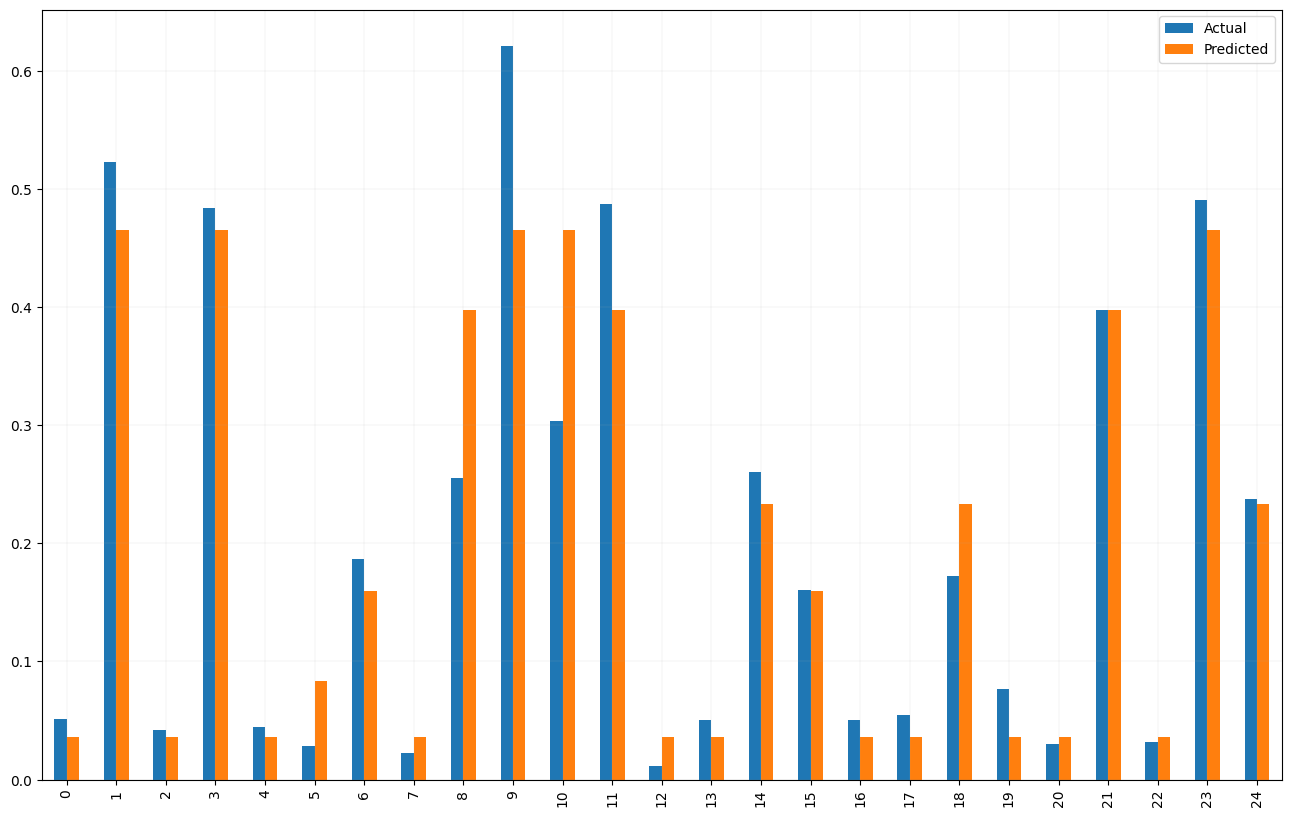

In [103]:
df_RT = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_pred_DTR.flatten()})

df1 = df_RT.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

Again, we see differences between predictions and acutal values. They are small for some but big for others.

Let's visualize the descision tree:

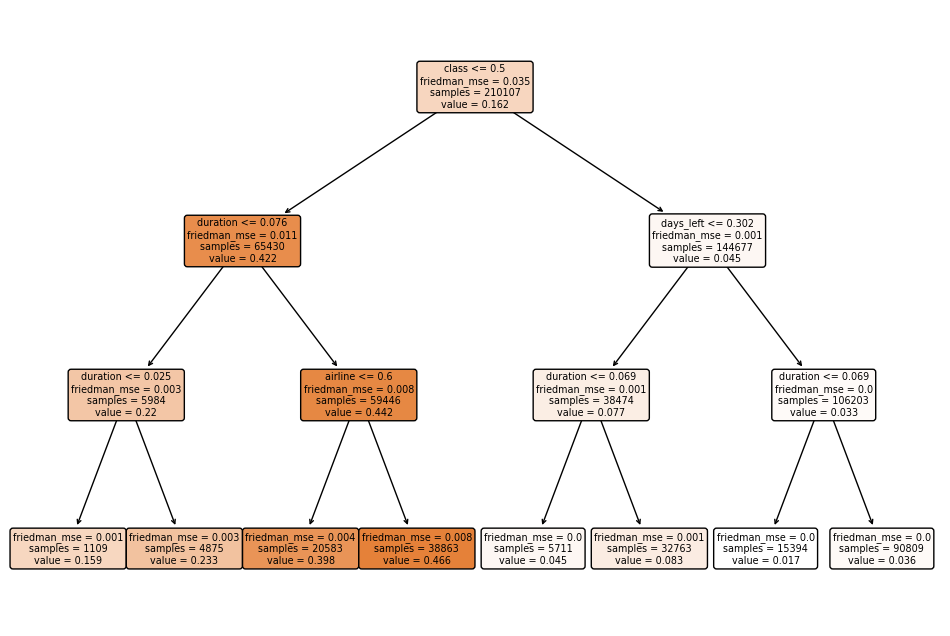

In [104]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

decision_tree_model = RT_model

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=list(selected_flightdf.columns[:6]), filled=True, rounded=True)
plt.show()


This is the tree on the basis of which the values are being predicted.

Let's evaluate our model using sklearn.metrics:

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

# MSE
MSE_DTR = mean_squared_error(Y_test, Y_pred_DTR)
print("MSE: ", MSE_DTR)

# RMSE
RMSE_DTR = np.sqrt(MSE_DTR)
print("RMSE: ", RMSE_DTR)

# MAE
MAE_DTR = mean_absolute_error(Y_test, Y_pred_DTR)
print("MAE: ", MAE_DTR)

# R2 Score
R2_DTR = r2_score(Y_test, Y_pred_DTR)
print("R2 Score: ", R2_DTR)

MSE:  0.0022710801418478217
RMSE:  0.04765585107673371
MAE:  0.02865706616966116
R2 Score:  0.9343576501240429


These metrics provide insights into the performance of your Decision Tree Regressor on the test data:

* The low MSE and RMSE values indicate that the model's predictions are close to the actual values.
* The MAE value of 0.02866 indicates the average absolute difference between the predicted and actual values.
* The high R2 score of 0.9344 suggests that a significant portion of the variance in the target variable is explained by the model.

In summary, the Decision Tree Regressor seems to be performing well on the test data, capturing the underlying patterns and providing accurate predictions.

### Model 3 - Random Forest Regressor

The Random Forest Regressor is a powerful machine learning algorithm used for regression tasks. It belongs to the ensemble learning family, combining the predictions of multiple decision trees to produce a more robust and accurate model. In the Random Forest, each tree is trained on a random subset of the training data, and at each node of the tree, a random subset of features is considered. This randomness helps to decorrelate the individual trees, reducing overfitting and improving the model's generalization to unseen data. The final prediction is obtained by averaging or taking the median of the predictions from all the trees. The Random Forest Regressor excels in capturing complex relationships within the data, handling both numerical and categorical features, and providing reliable predictions across various types of regression problems. Additionally, it offers the advantage of feature importance analysis, aiding in understanding the influential factors driving the model's predictions. We will be using this as our next model for prediciting prices.

In [106]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor object with 50 estimators
rfr = RandomForestRegressor(n_estimators=50, random_state=0)

# Train the RandomForestRegressor on the training data
rfr.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data
Y_pred_rfr = rfr.predict(X_test)

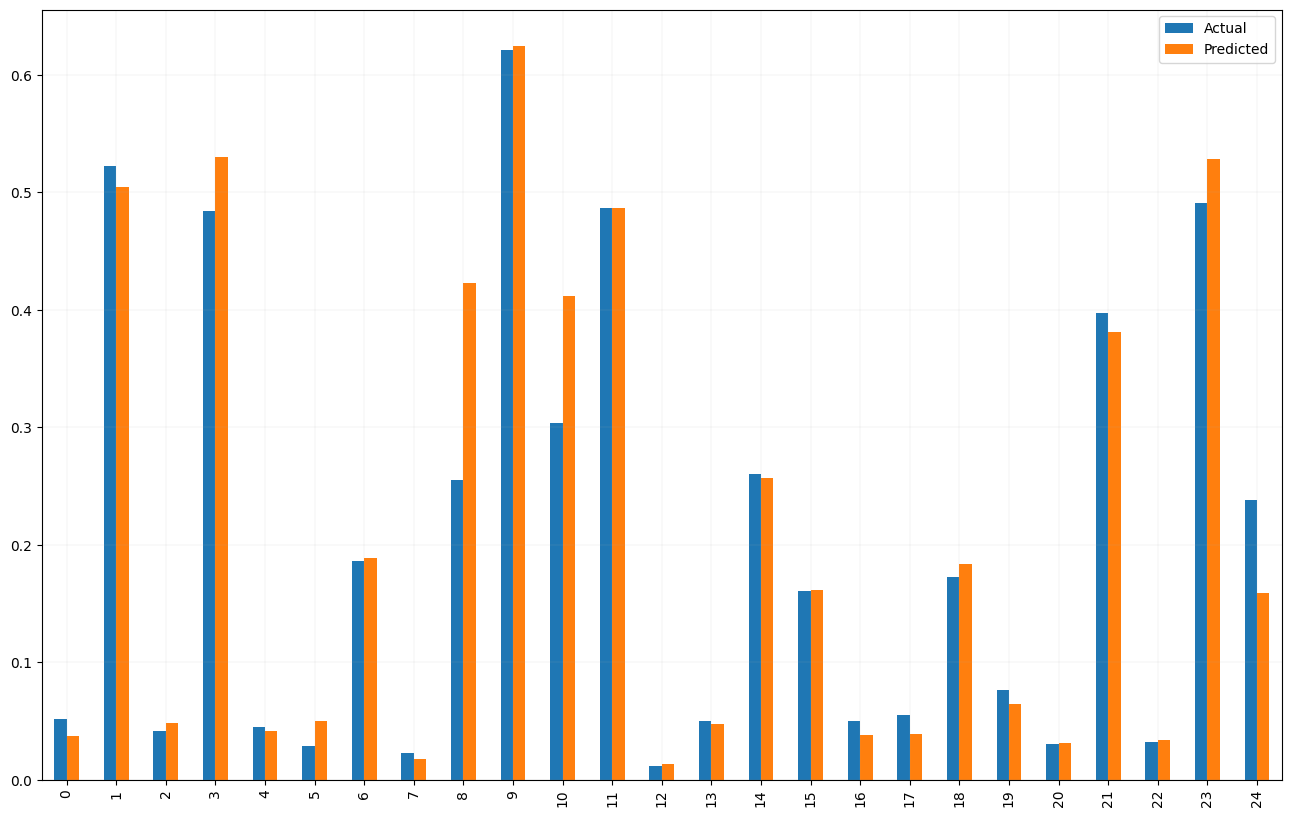

In [107]:
df_rfr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_pred_rfr.flatten()})

df1 = df_rfr.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()


The predicted values seem to be very close to the actual values, the difference is very less than the other models so far.

Random forest consists an ensemble of multiple decision trees, let's take a look at one of them:

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate Mean Squared Error (MSE)
MSE_RFR = mean_squared_error(Y_test, Y_pred_rfr)
print("MSE: ", MSE_RFR)

# Calculate Root Mean Squared Error (RMSE)
RMSE_RFR = np.sqrt(MSE_RFR)
print("RMSE: ", RMSE_RFR)

# Calculate Mean Absolute Error (MAE)
MAE_RFR = mean_absolute_error(Y_test, Y_pred_rfr)
print("MAE: ", MAE_RFR)

# Calculate R2 Score
R2_RFR = r2_score(Y_test, Y_pred_rfr)
print("R2 Score: ", R2_RFR)


MSE:  0.0017495168857788615
RMSE:  0.04182722660873969
MAE:  0.021824232214934333
R2 Score:  0.9494326961809673


## Model Comparison

In [114]:

# Define the models and their results
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
MSE = [MSE_LR, MSE_DTR, MSE_RFR]
RMSE = [RMSE_LR, RMSE_DTR, RMSE_RFR]
MAE = [MAE_LR, MAE_DTR, MAE_RFR]
R2 = [R2_LR, R2_DTR, R2_RFR]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R Squared': R2
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['RMSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results



,Model,MSE,RMSE,MAE,R Squared
Model no.,,,,,
1,Linear Regression,0.003310,0.057533,0.037898,0.904329
2,Decision Tree Regressor,0.002271,0.047656,0.028657,0.934358
3,Random Forest Regressor,0.001750,0.041827,0.021824,0.949433


* The lower the values of MSE, RMSE, and MAE, the better the model performance. Therefore, Random Forest Regressor (RFR) performs better than both Linear Regression (LR) and Decision Tree Regressor (DTR) in terms of these metrics.
* R Squared (R2) is a measure of how well the model explains the variance in the data. A higher R2 indicates a better fit. Again, Random Forest Regressor (RFR) has the highest R Squared value, suggesting it provides a better overall fit compared to LR and DTR.
* Random Forest Regressor (RFR) seems to be the most effective model among the three based on the provided metrics.

Comparing these models, it is evident that the Random Forest Regressor (RFR) outperforms the others. It exhibits the lowest MSE, RMSE, and MAE, as well as the highest R-squared value. These performance metrics collectively indicate that the Random Forest Regressor provides the most accurate and precise predictions among the three options.

## Conclusion

We addressed a regression problem involving the prediction of prices, a continuous target variable. After an extensive modeling process, the Random Forest Regressor (RFR) stood out as the optimal model among the three alternatives, exhibiting a remarkable R-squared value of 0.95. This signifies that the model effectively captures a significant portion of the variance in the target variable.

Our methodology was characterized by a systematic and iterative approach. We explored various strategies to enhance model accuracy, including feature selection methods and scaling of categorical variables. While the scaling of categorical variables did not result in a significant improvement, the choice of the Random Forest Regressor as the final model, with a robust R-squared value, suggests its efficacy in addressing our regression problem.

Overall, the strong performance of the Random Forest Regressor implies that it serves as a reliable and accurate solution for our regression task, and additional fine-tuning or feature engineering may not be necessary, given the already high predictive power achieved.






